# Описание проекта
<br>Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки абонентская плата отсутствует;<br>
<br>стоимость одной минуты поездки — 8 рублей;<br>
<br>стоимость старта (начала поездки) — 50 рублей;с подпиской Ultra абонентская плата — 199 рублей в месяц;<br>
<br>стоимость одной минуты поездки — 6 рублей;<br>
<br>стоимость старта — бесплатно.<br>
<br>Описание данных<br>
<br>В основных данных есть информация о пользователях, их поездках и подписках.<br>
<br>Пользователи — users_go.csv
<br>user_id	уникальный идентификатор пользователя
<br>name	имя пользователя
<br>age	возраст
<br>city	город
<br>subscription_type	тип подписки (free, ultra)
<br>Поездки — rides_go.csv
<br>user_id	уникальный идентификатор пользователя
<br>distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
<br>duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
<br>date	дата совершения поездки
<br>Подписки — subscriptions_go.csv
<br>subscription_type	тип подписки
<br>minute_price	стоимость одной минуты поездки по данной подписке
<br>start_ride_price	стоимость начала поездки
<br>subscription_fee	стоимость ежемесячного платежа<br>


Импортируем билиотеки для работы

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
pd.set_option('display.float_format', '{:,.2f}'.format)

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение.
</div>

#### Шаг 1. Загрузка данных

Знакомство с данными

Пропишем функцию и откроем данные

In [2]:
def my_func(x):
    print('------------- Исходный датафрейм -------------')
    display(x.head())
    print('')
    print('')
    print('------------- Общая информация о датафрейме -------------')
    print('')
    print('')
    display(x.info())
    print('------------- Количество пустых значений в датафрейме -------------')
    print('')
    print('')
    display(x.isna().sum())
    print('------------- Количество явных дубликатов в датафрейме -------------')
    display(x.duplicated().sum())
    print('')
    print('')
    print('------------- Описательная статистика -------------')
    display(x.describe())
    


In [3]:
u_go = pd.read_csv(r"C:\Users\lebed\Downloads\users_go.csv")

In [4]:
my_func(u_go)

------------- Исходный датафрейм -------------


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra




------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

------------- Количество пустых значений в датафрейме -------------




user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------


31



------------- Описательная статистика -------------


,user_id,age
count,"1,565.00","1,565.00"
mean,762.63,24.92
std,443.26,4.55
min,1.00,12.00
25%,378.00,22.00
50%,762.00,25.00
75%,"1,146.00",28.00
max,"1,534.00",43.00


In [5]:
r_go=pd.read_csv(r"C:\Users\lebed\Downloads\rides_go.csv", parse_dates=['date'])

In [6]:
my_func(r_go)

------------- Исходный датафрейм -------------


,user_id,distance,duration,date
0,1,"4,409.92",25.60,2021-01-01
1,1,"2,617.59",15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,"2,694.78",18.51,2021-08-11
4,1,"4,028.69",26.27,2021-08-28




------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

------------- Количество пустых значений в датафрейме -------------




user_id     0
distance    0
duration    0
date        0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------


0



------------- Описательная статистика -------------


,user_id,distance,duration,date
count,"18,068.00","18,068.00","18,068.00",18068
mean,842.87,"3,070.66",17.81,2021-06-30 19:47:21.266327296
min,1.00,0.86,0.50,2021-01-01 00:00:00
25%,487.00,"2,543.23",13.60,2021-04-02 00:00:00
50%,889.00,"3,133.61",17.68,2021-06-30 00:00:00
75%,"1,213.25","3,776.22",21.72,2021-09-28 00:00:00
max,"1,534.00","7,211.01",40.82,2021-12-30 00:00:00
std,434.73,"1,116.83",6.09,NaN


In [7]:
s_go=pd.read_csv(r"C:\Users\lebed\Downloads\subscriptions_go.csv")

In [8]:
my_func(s_go)

------------- Исходный датафрейм -------------


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199




------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None

------------- Количество пустых значений в датафрейме -------------




subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------


0



------------- Описательная статистика -------------


,minute_price,start_ride_price,subscription_fee
count,2.00,2.00,2.00
mean,7.00,25.00,99.50
std,1.41,35.36,140.71
min,6.00,0.00,0.00
25%,6.50,12.50,49.75
50%,7.00,25.00,99.50
75%,7.50,37.50,149.25
max,8.00,50.00,199.00


Ознакомились с данными, выявили, что данные представлены в правильном формате для работы, кроме столбца Data, который поправим в следующем шаге. Также, стоит отметить, что в данных не наблюдается слишком максимальных данных, которые стоит убрать из анализа.

#### Шаг 2. Предобработка данных

In [9]:
r_go.sort_values(by="date",ascending=True)

,user_id,distance,duration,date
0,1,"4,409.92",25.60,2021-01-01
13113,1184,"5,322.18",25.21,2021-01-01
5445,582,"2,842.01",22.18,2021-01-01
12775,1159,"3,098.41",18.30,2021-01-01
17096,1467,"1,875.82",16.04,2021-01-01
...,...,...,...,...
15325,1340,"3,857.68",23.62,2021-12-30
7541,774,"3,008.53",9.45,2021-12-30
6115,655,"3,803.88",21.68,2021-12-30
10991,1027,"5,080.10",15.70,2021-12-30


Создаем новый столбец с номером месяца на основе столбца date. Данные предоставлены за 1 год (2021)

In [10]:
r_go['month'] = r_go['date'].dt.month

In [11]:
r_go

,user_id,distance,duration,date,month
0,1,"4,409.92",25.60,2021-01-01,1
1,1,"2,617.59",15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,"2,694.78",18.51,2021-08-11,8
4,1,"4,028.69",26.27,2021-08-28,8
...,...,...,...,...,...
18063,1534,"3,781.10",19.82,2021-11-04,11
18064,1534,"2,840.42",21.41,2021-11-16,11
18065,1534,"3,826.19",18.44,2021-11-18,11
18066,1534,"2,902.31",16.67,2021-11-27,11


Проверка пропущенных значений и дубликатов в датафреймах

In [12]:
u_go.duplicated().sum()

31

In [13]:
r_go.duplicated().sum()

0

In [14]:
s_go.duplicated().sum()

0

Дубликаты присутствуют только в дата users. Удалим их.

In [15]:
u_go.drop_duplicates(inplace=True)

In [16]:
u_go.duplicated().sum()

0

In [17]:
u_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [18]:
r_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [19]:
s_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропущенных данных в таблицах нет, дубликаты были только в таблице users и мы их удалили. Добавили столбец с номером месяца.

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:

3.1. частота встречаемости городов;

In [20]:
number_of_users_by_city=u_go['city'].value_counts()
print(number_of_users_by_city)

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64


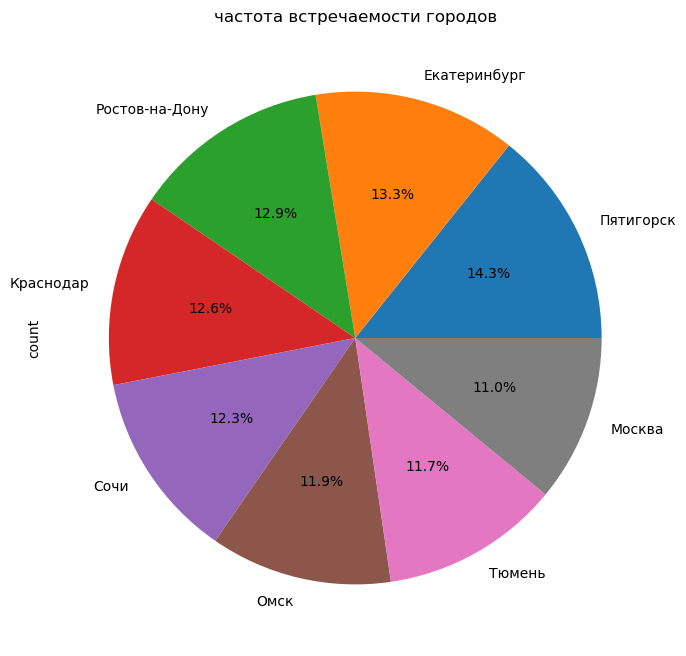

In [21]:
u_go['city'].value_counts().plot(
    kind = 'pie', title = 'частота встречаемости городов',figsize=(8,8),
    autopct = '%1.1f%%');

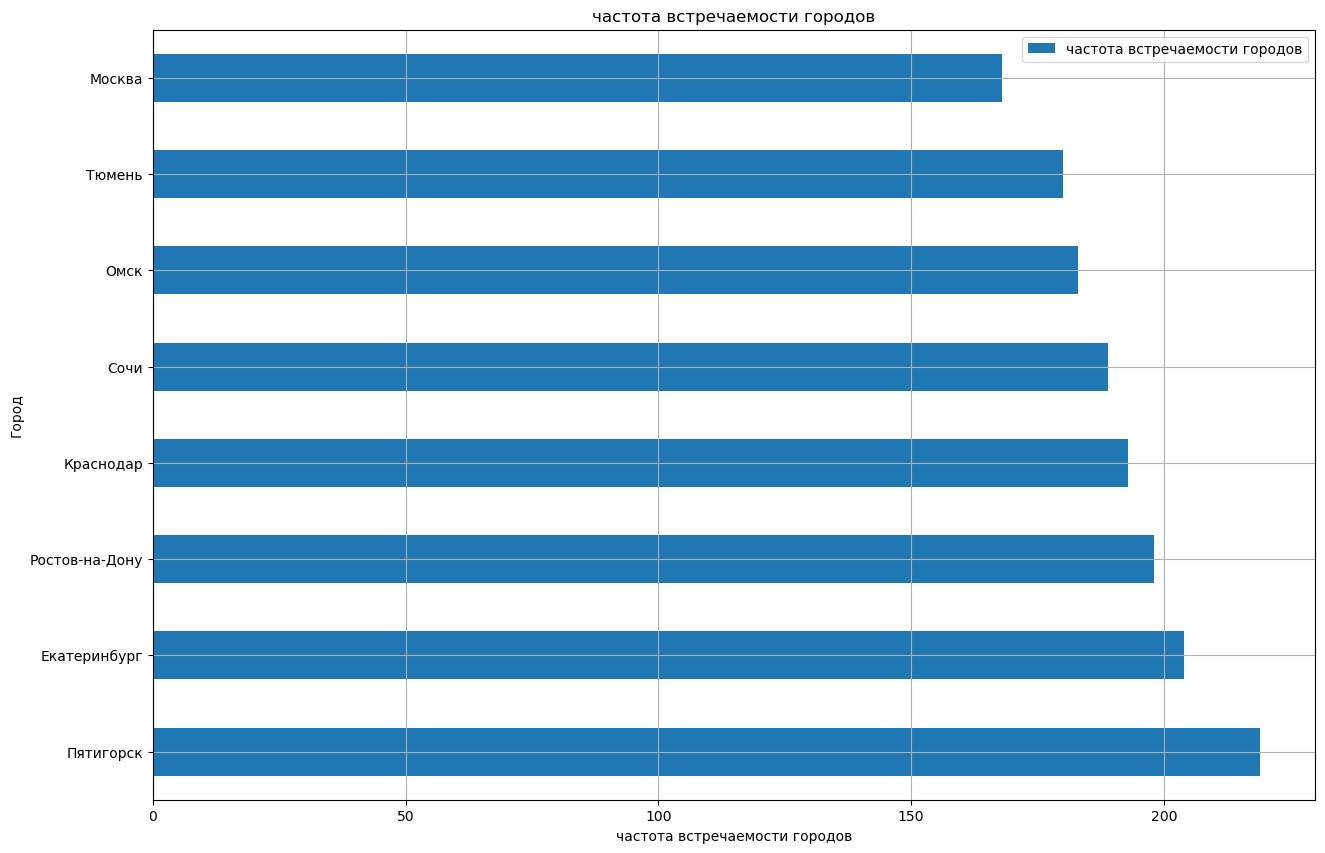

In [22]:
u_go['city'].value_counts().plot(kind='barh',  grid=True, figsize=(15, 10))
plt.title('частота встречаемости городов')
plt.xlabel('частота встречаемости городов')
plt.ylabel('Город')
plt.legend(['частота встречаемости городов'])
plt.show()

3.2 соотношение пользователей с подпиской и без подписки;

In [23]:
users_sub = u_go['subscription_type'].value_counts()
display (users_sub)

subscription_type
free     835
ultra    699
Name: count, dtype: int64

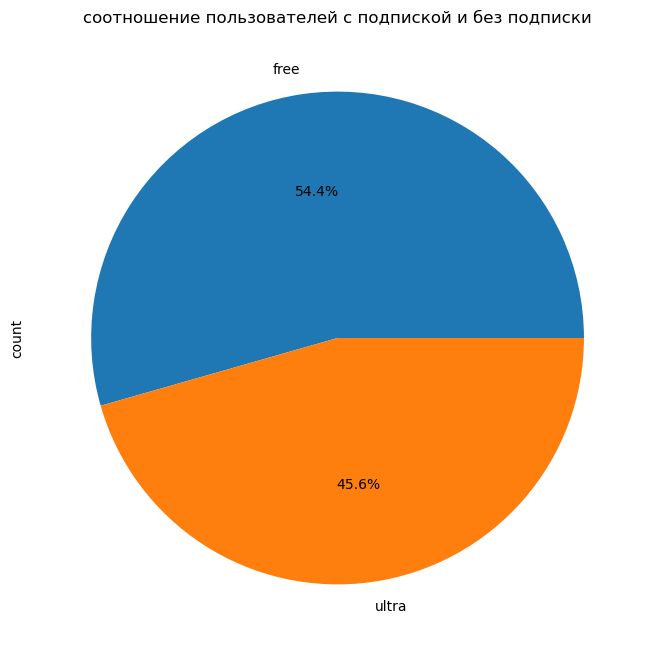

In [24]:
u_go['subscription_type'].value_counts().plot(
    kind = 'pie', title = 'соотношение пользователей с подпиской и без подписки',figsize=(8,8), 
    autopct = '%1.1f%%');

3.3 возраст пользователей;

In [25]:
u_go['age'].describe()

count   1,534.00
mean       24.90
std         4.57
min        12.00
25%        22.00
50%        25.00
75%        28.00
max        43.00
Name: age, dtype: float64

In [26]:
users_age=u_go['age'].value_counts()
display(users_age)

age
25    145
24    132
26    131
23    129
22    119
27    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
16     19
34     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: count, dtype: int64

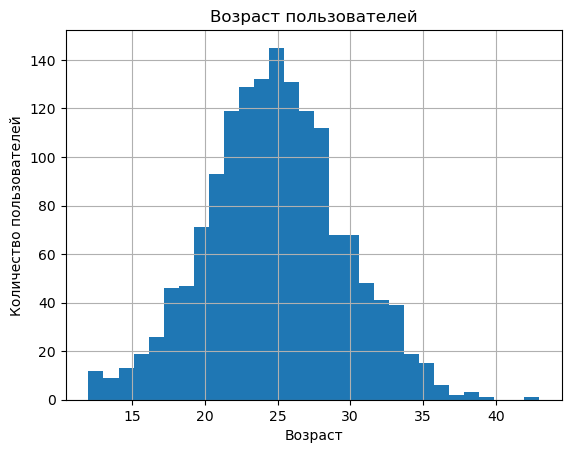

In [27]:
plt.hist(u_go['age'], bins = 30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

3.4 расстояние, которое пользователь преодолел за одну поездку;

In [28]:
r_go.describe()

,user_id,distance,duration,date,month
count,"18,068.00","18,068.00","18,068.00",18068,"18,068.00"
mean,842.87,"3,070.66",17.81,2021-06-30 19:47:21.266327296,6.49
min,1.00,0.86,0.50,2021-01-01 00:00:00,1.00
25%,487.00,"2,543.23",13.60,2021-04-02 00:00:00,4.00
50%,889.00,"3,133.61",17.68,2021-06-30 00:00:00,6.00
75%,"1,213.25","3,776.22",21.72,2021-09-28 00:00:00,9.00
max,"1,534.00","7,211.01",40.82,2021-12-30 00:00:00,12.00
std,434.73,"1,116.83",6.09,NaN,3.44


In [29]:
display(r_go.sort_values(by='distance').head(10))
display(r_go.sort_values(by='distance').tail(10))
display(r_go.loc[11385])

,user_id,distance,duration,date,month
11555,1069,0.86,10.00,2021-01-31,1
9541,925,2.57,3.01,2021-10-19,10
13690,1223,4.33,4.01,2021-05-22,5
8658,861,6.78,6.02,2021-07-21,7
7841,796,7.10,10.03,2021-11-26,11
8906,880,11.28,2.04,2021-03-28,3
8324,835,12.23,4.03,2021-09-19,9
13940,1240,15.00,10.05,2021-08-20,8
15626,1364,15.37,6.06,2021-08-22,8
11862,1091,15.63,13.04,2021-03-29,3


,user_id,distance,duration,date,month
11319,1052,"6,503.60",26.01,2021-07-01,7
10915,1022,"6,535.39",30.01,2021-10-14,10
12086,1108,"6,538.94",29.65,2021-09-27,9
11385,1057,"6,601.20",0.50,2021-02-07,2
10341,981,"6,671.97",27.30,2021-12-06,12
17242,1477,"6,724.93",0.50,2021-01-12,1
17171,1471,"6,760.94",32.04,2021-08-03,8
15580,1361,"6,908.49",23.82,2021-03-27,3
16484,1422,"7,066.00",23.62,2021-02-12,2
16309,1411,"7,211.01",0.50,2021-04-15,4


user_id                    1057
distance               6,601.20
duration                   0.50
date        2021-02-07 00:00:00
month                         2
Name: 11385, dtype: object

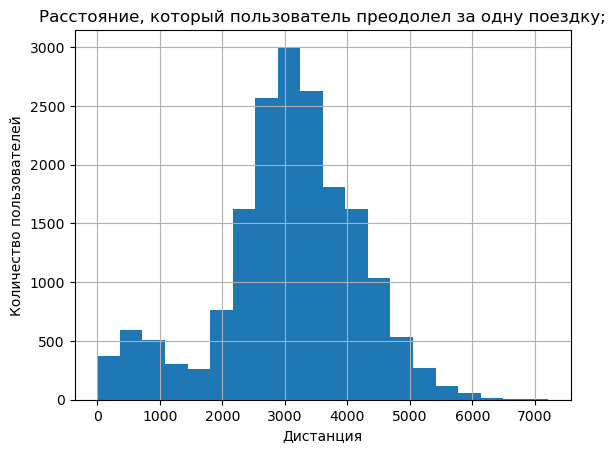

In [30]:
plt.hist(r_go['distance'], bins = 20)
plt.title('Расстояние, который пользователь преодолел за одну поездку;')
plt.xlabel('Дистанция')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

3.5 продолжительность поездок.

In [31]:
display(r_go.sort_values(by='duration').head(96))
display(r_go.sort_values(by='duration').tail(10))
display(r_go['duration'].unique().sum())

,user_id,distance,duration,date,month
12013,1102,"4,602.12",0.50,2021-08-01,8
17314,1483,"4,445.48",0.50,2021-03-06,3
15029,1318,"5,894.63",0.50,2021-03-28,3
7437,766,"4,539.09",0.50,2021-12-22,12
12967,1172,"4,907.14",0.50,2021-12-19,12
...,...,...,...,...,...
12088,1109,"5,202.56",0.50,2021-01-08,1
7160,745,"5,286.17",0.50,2021-08-17,8
10182,970,"5,180.55",0.50,2021-08-07,8
6680,712,"4,684.00",0.50,2021-03-04,3


,user_id,distance,duration,date,month
4653,501,"4,103.77",36.62,2021-05-24,5
6348,681,"4,134.88",36.81,2021-05-01,5
499,55,"4,151.08",36.91,2021-06-30,6
3729,401,"4,002.36",37.01,2021-09-21,9
143,15,"4,187.62",38.13,2021-01-13,1
6453,694,"4,210.87",38.27,2021-03-11,3
1998,216,"4,831.34",38.35,2021-05-11,5
2623,278,"4,754.43",39.53,2021-12-02,12
4709,507,"4,645.64",39.87,2021-01-15,1
4215,454,"5,137.33",40.82,2021-12-27,12


321653.9423251829

In [32]:
# Выведем описание столбца продолжительности поездок
r_go['duration'].describe().round(2)

count   18,068.00
mean        17.81
std          6.09
min          0.50
25%         13.60
50%         17.68
75%         21.72
max         40.82
Name: duration, dtype: float64

Минимальная продолжительность поездки: 0
Максимальная продолжительность поездки: 41


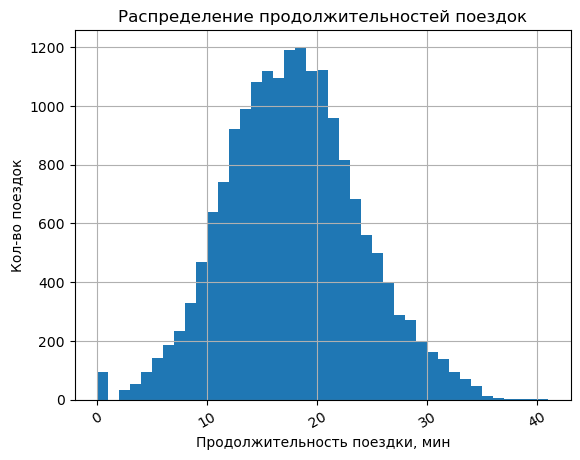

In [33]:
# Выведем минимальное и максимальное продолжительности поездок в минутах
print('Минимальная продолжительность поездки:', round(r_go['duration'].min()))
print('Максимальная продолжительность поездки:', round(r_go['duration'].max()))

# Построим гистрограмму распределения преодоленных за одну поездку расстояний
plt.hist(r_go['duration'], bins=41, range=(0, 41))
plt.grid() # включим отображение сетки
plt.xticks(rotation=30) # повернем название дат для корректного отображения
plt.xlabel('Продолжительность поездки, мин') # подпишем ось Х
plt.ylabel('Кол-во поездок') # подпишем ось Y
plt.title('Распределение продолжительностей поездок') # дадим название гистограмме
plt.show()

In [34]:
def  r_go_per(row):
    if row['duration'] == 0.5:
        return row['distance']/123.9
    return row['duration']

In [35]:
r_go['duration']=r_go.apply(r_go_per, axis=1)

In [36]:
display(r_go.sort_values(by='duration').head(96))
display(r_go['duration'].unique().sum())
display(r_go.loc[11385])

,user_id,distance,duration,date,month
8906,880,11.28,2.04,2021-03-28,3
6691,712,23.96,2.05,2021-11-22,11
13308,1198,84.41,2.18,2021-06-11,6
17309,1482,111.30,2.22,2021-07-24,7
14081,1251,41.21,2.22,2021-04-15,4
...,...,...,...,...,...
12477,1137,474.21,4.03,2021-08-11,8
8324,835,12.23,4.03,2021-09-19,9
13764,1228,244.97,4.05,2021-09-20,9
17035,1462,262.77,4.05,2021-07-10,7


325573.95703148574

user_id                    1057
distance               6,601.20
duration                  53.28
date        2021-02-07 00:00:00
month                         2
Name: 11385, dtype: object

In [37]:
r_go.describe()


,user_id,distance,duration,date,month
count,"18,068.00","18,068.00","18,068.00",18068,"18,068.00"
mean,842.87,"3,070.66",18.02,2021-06-30 19:47:21.266327296,6.49
min,1.00,0.86,2.04,2021-01-01 00:00:00,1.00
25%,487.00,"2,543.23",13.70,2021-04-02 00:00:00,4.00
50%,889.00,"3,133.61",17.75,2021-06-30 00:00:00,6.00
75%,"1,213.25","3,776.22",21.82,2021-09-28 00:00:00,9.00
max,"1,534.00","7,211.01",58.20,2021-12-30 00:00:00,12.00
std,434.73,"1,116.83",6.21,NaN,3.44


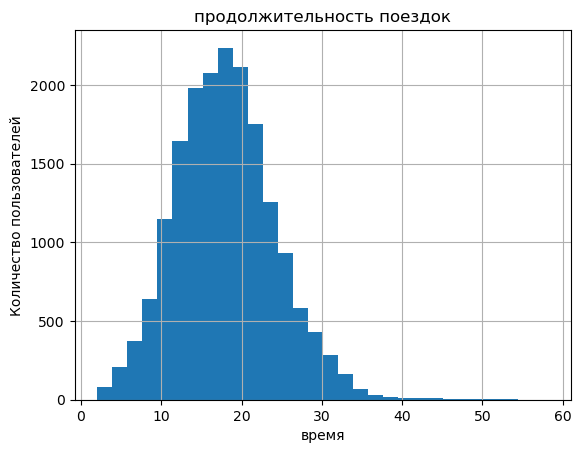

In [38]:
plt.hist(r_go['duration'], bins = 30)
plt.title('продолжительность поездок')
plt.xlabel('время')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Проведенный анализ показал, что кол-во пользователей по городам распределено примерно в одинаковых пропроциях, максимальное значение наблюдается в Пятигорске- 219, минимальное -Москва (168). По соотношению кол-во пользователей с подпиской и без, тоже не наблюдается какого-то значемого сдвига в процентном соотношении в одну или другую стороную( 835 - free и 699- ultra) ,т.е. порядка 54% / 46 %.
основная возрастная группа, использующая самокат, находится в диапазоне от 25 до 29 лет, самому младшему 12,старшему-43.
Расстояние, которое пользователи преодолевают за время использования, составляет в среднем от 2,5 км до 4 км, наименьшее растояние было 0,0086 км, максимальное растояние - 7,2 км.
Время поездки, исходя из данных, которое во время анализа было немного скорректировано, т.к. были найдены аномальные значения с достаточно высокими показатели растояния проделанного за период в 50 сек, было выявлено порядка 95 показателей, которые в рамках общей статистики не очень бы повлияли на выборку, но в рамках более релевантных значений,а также, что в данные были с очень большим километражом, было принято решение заменить данные показатели на среднее значения последних 100 по возрастающему порядку. Таким образом, среднее значение стало порядка 18 мин, максимальное 58,2 и минимальное 2,04.(без изменения макс значение было 40,8 )

#### Шаг 4. Объединение данных

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. 

In [39]:
display(u_go.info())
display(r_go.info())
display(s_go.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None

In [40]:
data=u_go.merge(r_go,how ='left')

In [41]:
data = data.merge(s_go,how='left')

In [42]:
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.92",25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.59",15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.78",18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.69",26.27,2021-08-28,8,6,0,199


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


In [44]:
data.duplicated().sum()

0

In [45]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:

c данными о пользователях без подписки;

In [46]:
without_sub = data.query("`subscription_type` == 'free'")

In [47]:
without_sub

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,"2,515.69",14.94,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.23,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,"4,004.43",20.02,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,"1,205.91",9.78,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,"3,047.38",17.43,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,"3,781.10",19.82,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,"2,840.42",21.41,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,"3,826.19",18.44,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,"2,902.31",16.67,2021-11-27,11,8,50,0


с данными о пользователях с подпиской

In [48]:
with_sub = data.query("`subscription_type` == 'ultra'")

In [49]:
with_sub

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.92",25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.59",15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.78",18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.69",26.27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,"3,973.05",24.67,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,"3,288.70",15.89,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,"3,076.16",14.39,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,"4,707.85",15.84,2021-10-17,10,6,0,199


Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

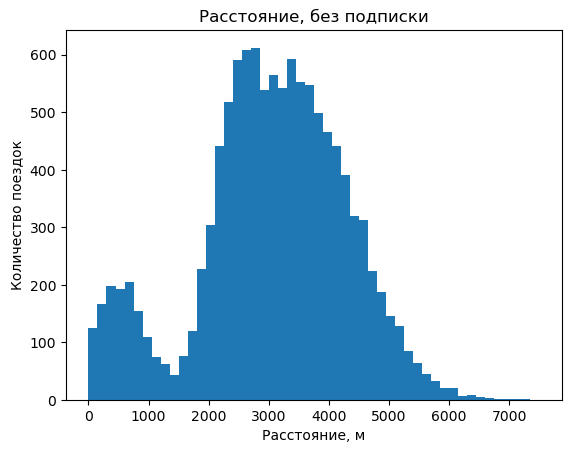

<Figure size 5000x5000 with 0 Axes>

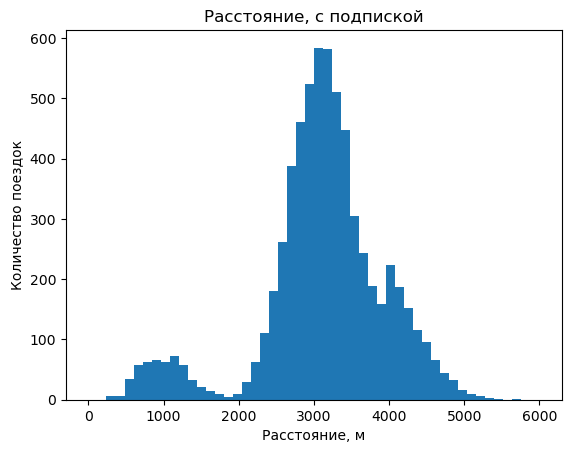

<Figure size 5000x5000 with 0 Axes>

In [50]:
plt.hist(without_sub['distance'], bins=50, range = (0, 7500))
plt.title('Расстояние, без подписки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(50,50))
plt.show()

plt.hist(with_sub['distance'], bins=50, range = (0, 6000))
plt.title('Расстояние, с подпиской')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(50,50))
plt.show()

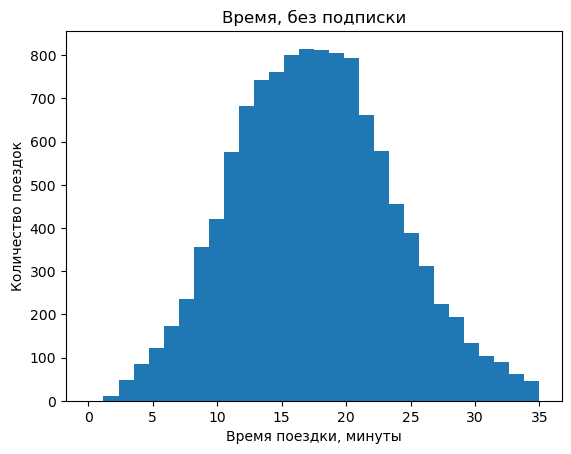

<Figure size 2000x2000 with 0 Axes>

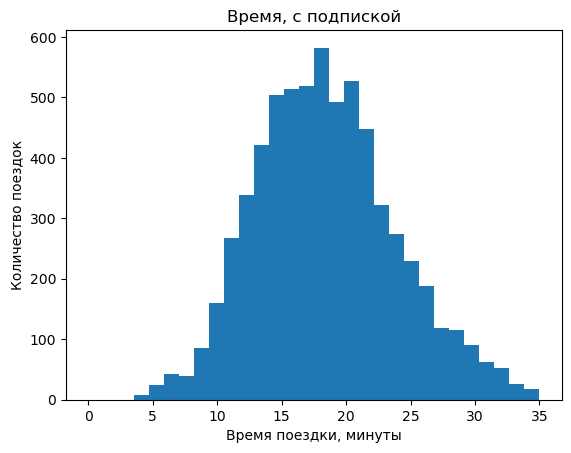

<Figure size 2000x2000 with 0 Axes>

In [51]:
plt.hist(without_sub['duration'], bins=30, range = (0, 35))
plt.title('Время, без подписки')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

plt.hist(with_sub['duration'], bins=30, range = (0, 35))
plt.title('Время, с подпиской')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

в данном шаге объединили данные о пользователях, поездках и тарифах в один датафрейм - data
создали два новых датафрема : с подпиской-with_sub, без подписки-without_sub
визуализировали данные по расстоянию и времени для новых датафреймов
вывод из представленной информации можно сделать слеудющий: без подписки люди берут самокат на разные дистанции, можно сказать от нуля и до 7,5 км, при этом основная масса поездок находится в диапазоне от 2 до 5 км, в этоже время поездки по подписке находятся в диапазоне от 2,5 до 4,5 и отсутствием как более длительных поезд, так и очень коротких ( 0- 500 м)
временной отрезок также совпадает с расстоянием, т.е. без подписки люди берут самокат  в интервале от 2  до 43

#### Шаг 5. Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [52]:
sum_data = pd.pivot_table(data,
                           index=['month', 'user_id'],
                            values = ['distance', 'duration', 'name', 'subscription_type','minute_price','start_ride_price','subscription_fee'],
                            aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min,
                                      'minute_price' : min,
                                      'start_ride_price': min,
                                       'subscription_fee': min
                                    })

In [53]:
sum_data

distance  duration  minute_price  name  start_ride_price  \
month user_id                                                             
1     1        7,027.51     41.42             6     2                 0   
      3        3,061.78     12.65             6     1                 0   
      5        3,914.65     12.40             6     1                 0   
      7        6,478.08     27.65             6     2                 0   
      12       3,577.15     32.46             6     1                 0   
...                 ...       ...           ...   ...               ...   
12    1525     4,597.85     33.22             8     1                50   
      1526     3,644.12     22.67             8     1                50   
      1528     3,998.57     10.27             8     1                50   
      1532     6,111.89     40.13             8     2                50   
      1534     2,371.71     15.89             8     1                50   

               subscription_fee subscription_type  
month user_id                                      
1     1                     199             ultra  
      3                     199             ultra  
      5                     199             ultra  
      7                     199             ultra  
      12                    199             ultra  
...                         ...               ...  
12    1525                    0              free  
      1526                    0              free  
      1528                    0              free  
      1532                    0              free  
      1534                    0              free  

[11331 rows x 7 columns]

добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [54]:
sum_data['duration'] = np.ceil(sum_data['duration'])

In [55]:
sum_data.head()

distance  duration  minute_price  name  start_ride_price  \
month user_id                                                             
1     1        7,027.51     42.00             6     2                 0   
      3        3,061.78     13.00             6     1                 0   
      5        3,914.65     13.00             6     1                 0   
      7        6,478.08     28.00             6     2                 0   
      12       3,577.15     33.00             6     1                 0   

               subscription_fee subscription_type  
month user_id                                      
1     1                     199             ultra  
      3                     199             ultra  
      5                     199             ultra  
      7                     199             ultra  
      12                    199             ultra

In [56]:
sum_data['pay']=(sum_data['start_ride_price']*\
               sum_data['name'])+\
(sum_data['duration']*sum_data['minute_price'])+sum_data['subscription_fee']


In [57]:
sum_data.sort_values(by='user_id').head(12)

,,distance,duration,minute_price,name,start_ride_price,subscription_fee,subscription_type,pay
month,user_id,,,,,,,,
1,1,"7,027.51",42.00,6,2,0,199,ultra,451.00
12,1,"6,751.63",28.00,6,2,0,199,ultra,367.00
11,1,"7,003.50",54.00,6,3,0,199,ultra,523.00
10,1,"5,809.91",32.00,6,2,0,199,ultra,391.00
4,1,754.16,7.00,6,1,0,199,ultra,241.00
8,1,"6,723.47",45.00,6,2,0,199,ultra,469.00
12,2,"3,828.25",12.00,6,1,0,199,ultra,271.00
3,2,"10,187.72",61.00,6,3,0,199,ultra,565.00
10,2,"2,824.64",19.00,6,1,0,199,ultra,313.00


Создали атафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4:
найдли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.


#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используя исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

H0: среднее время время поездок пользователей с подпиской = без подписки 

H1: cреднее время время поездок пользователей с подпиской > без подписки 

alpha = 0.05

In [58]:
ultra = with_sub['duration'] 

free= without_sub['duration']

results = st.ttest_ind(ultra, 
                      free,alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.0127745921539222e-17
Отвергаем нулевую гипотезу


вывод:отвергли гипотезу о том, что время поездки пользователей с подпиской равно времени поездки пользователей без нее.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 


H0: Расстояние одной поездки  пользователя c подпиской > 3130 метров

H1: Расстояние одной поездки пользователя с подпиской < 3130 метров

alpha = 0.05

In [59]:
ultra_m = with_sub['distance']

interested_value = 3130.0

alpha = .05

results = st.ttest_1samp(ultra_m, 
                      interested_value,alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Вывод:
    нельзя сказать,что расстояние, которое проезжают пользователи с подпиской не превышает 3130 метров.

6.3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки


    
H0: Выручка пользователей по подписке  = выручка пользователей без нее

H1: Выручка  пользователей по подписке  > выручка  пользователей без нее


In [60]:
revenue_Ultra = sum_data.loc[sum_data.subscription_type == 'ultra', 'pay'] 

revenue_free = sum_data.loc[sum_data.subscription_type == 'free', 'pay'] 


results = st.ttest_ind(revenue_Ultra, 
                       revenue_free
                       )

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.5813615139253414e-26
Отвергаем нулевую гипотезу


# вывод:
в данной случае, гипотеза о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, оказалось верна
    </div>

6.4. Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В данному случае, получается использовать нужно будеть Гипотезу о равенстве средних для зависимых (парных) выборок,если вы анализируете одну генеральную совокупность, с которой произошли некоторые изменения. В этом случае вы будете проверять, равны ли средние совокупности до и после этого изменения. Таким образом,
H0: μ1=μ2
H1: μ1=μ2,
где \mu_1μ1 и \mu_2μ 2— средние значения до и после изменения.
Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel().


Набор данных до изменений и после изменений. Далее полученное p-значение этого метода сравнивается с уровнем статистической значимости. Это - односторонняя гипотеза.

Проверили 3 гипотизы:
    <br>1)отвергли гипотезу о том, что время поездки пользователей с подпиской равно времени поездки пользователей без нее.<br>
    <br>2)нельзя сказать,что расстояние, которое проезжают пользователи с подпиской не превышает 3130 метров.<br>
    <br>3)в данной случае, гипотеза о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, оказалось верна<br>
    

#### Шаг 7. Распределения

Общий вывод

<br>1) Загрузили и изучили 3 базы с данными позьзователями из нескольких городов с информацией о поездка и подписках,стоиомсти поездки и разными тарифами<br>
<br>2) далее, предобработали данные,пропущенных данных в таблицах нет, дубликаты были только в таблице users и мы их удалили. Добавили столбец с номером месяца.<br>
<br>3) провели исследовательский анализ,вывели, что кол-во пользователей по городам распределено примерно в одинаковых пропроциях, максимальное значение наблюдается в Пятигорске- 219, минимальное -Москва (168). По соотношению кол-во пользователей с подпиской и без, тоже не наблюдается какого-то значемого сдвига в процентном соотношении в одну или другую стороную( 835 - free и 699- ultra) ,т.е. порядка 54% / 46 %. основная возрастная группа, использующая самокат, находится в диапазоне от 25 до 29 лет, самому младшему 12,старшему-43. Расстояние, которое пользователи преодолевают за время использования, составляет в среднем от 2,5 км до 4 км, наименьшее растояние было 0,0086 км, максимальное растояние - 7,2 км. Время поездки, исходя из данных, которое во время анализа было немного скорректировано, т.к. были найдены аномальные значения с достаточно высокими показатели растояния проделанного за период в 50 сек, было выявлено порядка 95 показателей, которые в рамках общей статистики не очень бы повлияли на выборку, но в рамках более релевантных значений,а также, что в данные были с очень большим километражом, было принято решение заменить данные показатели на среднее значения последних 100 по возрастающему порядку. Таким образом, среднее значение стало порядка 18 мин, максимальное 58,2 и минимальное 2,04.(без изменения макс значение было 40,8 )<br>
<br>4) Проверили 3 гипотизы: <br>1)отвергли гипотезу о том, что время поездки пользователей с подпиской равно времени поездки пользователей без нее.<br>
    <br>2)нельзя сказать,что расстояние, которое проезжают пользователи с подпиской не превышает 3130 метров.<br>
    <br>3)в данной случае, гипотеза о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, оказалось верна<br><br>